 # Predicting Customer Churn
 
<b>Objective: building a model that identifies customers with the intention to leave in the near future</b>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

labelencoder= LabelEncoder()
OneHotEncoder = OneHotEncoder()


## Loading dataset 

Assessig general info of dataset

In [3]:
df = pd.read_csv('Customer_Churn.csv')
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for i in range(len(df)):
    if (df['TotalCharges'][i] == ' '):
        df['TotalCharges'][i] = df['MonthlyCharges'][i]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df.drop('customerID', axis =1, inplace = True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5,0,'Amount ($)')

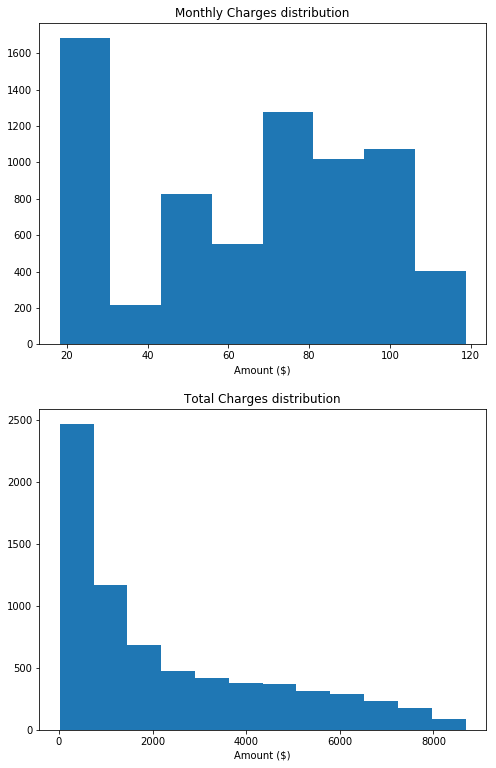

In [11]:
plt.figure(figsize = (8,13))
plt.subplot(2,1,1)
plt.hist(df['MonthlyCharges'], bins = 8)
plt.title('Monthly Charges distribution')
plt.xlabel('Amount ($)')

plt.subplot(2,1,2)
plt.hist(df['TotalCharges'], bins = 12)
plt.title('Total Charges distribution')
plt.xlabel('Amount ($)')

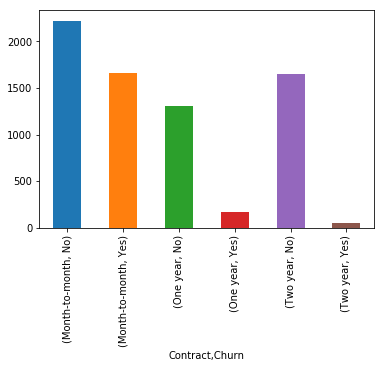

In [12]:
df.groupby(['Contract','Churn'])['Churn'].count().plot(kind= 'bar')

Text(0.5,1,'Percentage of Churn in Dataset')

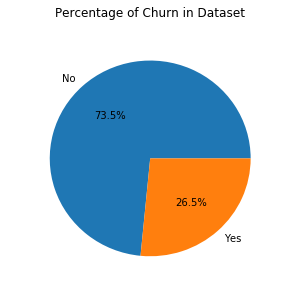

In [13]:
label = ['No','Yes']
plt.figure(figsize=(5,5))
plt.pie(df['Churn'].value_counts(sort = True), labels= label, startangle=360, radius = 0.9, autopct='%1.1f%%')
plt.title('Percentage of Churn in Dataset')

In [14]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df_copy = df.iloc[:,:-1]

In [16]:
#df_copy['Churn'] = labelencoder.fit_transform(df['Churn'])

df_copy = pd.get_dummies(df_copy,columns = ['gender','MultipleLines','InternetService','Contract','PaymentMethod',
                                            'Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup',
                                            'DeviceProtection','TechSupport','StreamingTV',
                                            'StreamingMovies','PaperlessBilling'],drop_first = True)

In [17]:
SC = StandardScaler()
df_copy['MonthlyCharges'] = SC.fit_transform(df_copy['MonthlyCharges'].values.reshape(-1,1))
df_copy['TotalCharges'] = SC.fit_transform(df_copy['TotalCharges'].values.reshape(-1,1))

In [18]:
X = df_copy
y = labelencoder.fit_transform(df['Churn'])

Text(0.5,1,'Feature Importance in Random Forests')

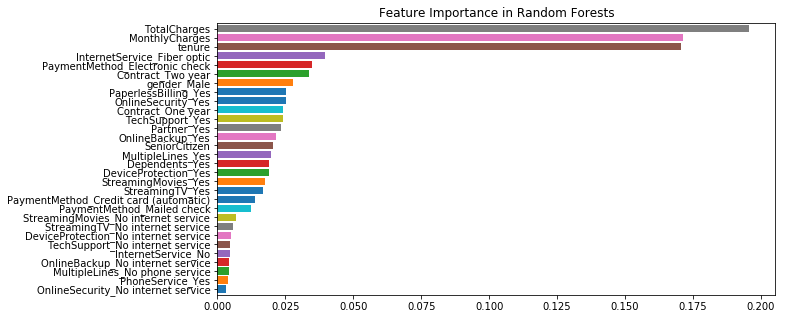

In [19]:
f,ax=plt.subplots(1,1,figsize=(10,5))
model=RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Random Forests')

In [20]:
Features_rank = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)

In [21]:
X = X[Features_rank[:20].index]

In [22]:
Classifier = {LogisticRegression(),
             DecisionTreeClassifier(),
             RandomForestClassifier()}

In [27]:
def classification(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    cls_accuracy = []
    for cls in classifier:
        cls.fit(X_train,y_train)
        
        y_pred = cls.predict(X_test)
        cls_accuracy.append(accuracy_score(y_pred,y_test))
    
    return cls_accuracy

In [28]:
cls_accuracy = classification(Classifier, X, y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
cls_accuracy

[0.7321344060577378, 0.7941315664931378, 0.7799337434926644]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

for cls in Classifier:
    score = cross_validate(cls,X_test,y_test,cv=10,scoring = 'accuracy',return_train_score=False)
    average_accuracy = np.mean(score['test_score'])
    
    print('{} \n\n the average accuracy of  is {}\n\n'.format(cls, average_accuracy))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

 the average accuracy of  is 0.7207815434141107


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

 the average accuracy of  is 0.7993539300724313




C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

 the average accuracy of  is 0.77757757310203




In [32]:
Gridsearch = {}

Gridsearch['dt'] = {'max_features': np.arange(1,10,1),
                    'min_samples_split': np.arange(3,10,1),
                    'min_samples_leaf': [1,2,4]
                }
Gridsearch['rf'] = {'n_estimators': np.arange(10,50,10),
                    'max_features': np.arange(1,10,1),
                    'min_samples_leaf': [1,2,4]
                }

Classifier = {'dt': DecisionTreeClassifier(),
              'rf': RandomForestClassifier()}
clf_name = ['dt','rf']

In [33]:
for clf in clf_name:
    mdl = GridSearchCV(Classifier[clf],Gridsearch[clf],scoring='accuracy')
    mdl.fit(X_train,y_train)
    
    print(mdl.best_score_)
    print(mdl.best_params_)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7762677484787018
{'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8010141987829614
{'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 30}


In [34]:
rf = RandomForestClassifier(max_features= 3, min_samples_leaf= 4, n_estimators= 40)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.49      0.56       553

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113

